In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
# eda
# 시각화를 통해서 -> 결측치를 대체할 인사이트 
# 범주를 어떻게 나누어줄지 고민

# 전처리
# 상관계수 -> 전처리 

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


[Text(0.5, 1.0, 'Embarked')]

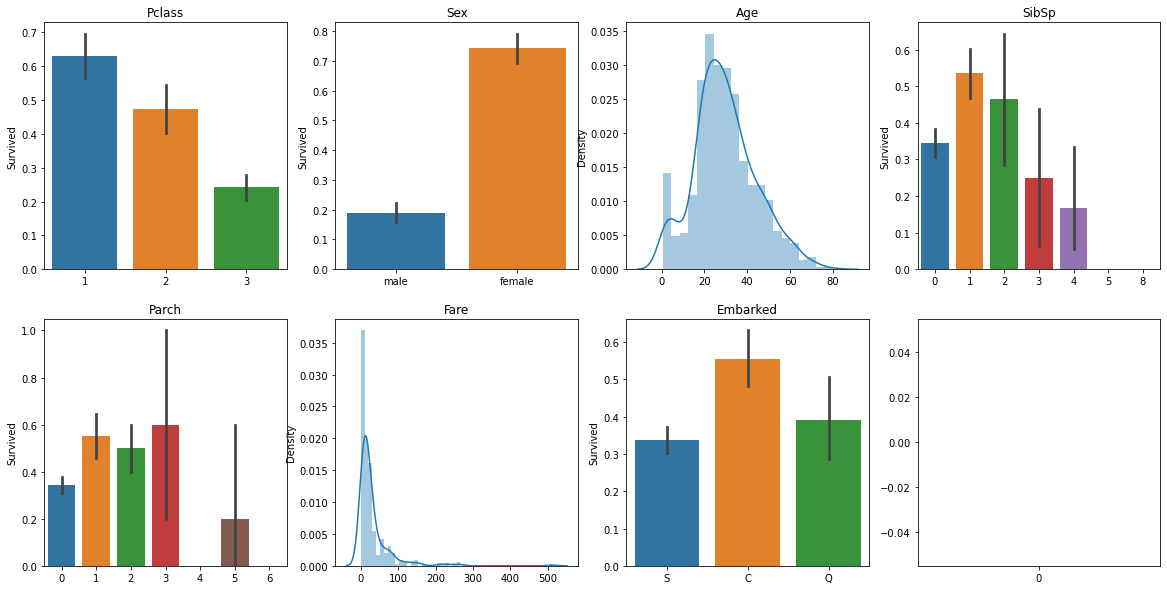

In [5]:
# 변수별 평균 생존률

fig, ((ax1,ax2,ax3,ax4),(ax5,ax6,ax7,ax8)) = plt.subplots(2,4)
fig.set_size_inches(20,10)

sns.barplot(x='Pclass', y='Survived',data= train, ax=ax1)
sns.barplot(x='Sex', y='Survived',data= train, ax=ax2)
sns.distplot(train['Age'], ax=ax3)
sns.barplot(x='SibSp', y='Survived',data= train, ax=ax4)
sns.barplot(x='Parch', y='Survived',data= train, ax=ax5)
sns.distplot(train['Fare'], ax=ax6)
sns.barplot(x='Embarked', y='Survived',data= train, ax=ax7)
sns.barplot(ax=ax8)

ax1.set(xlabel='')
ax2.set(xlabel='')
ax3.set(xlabel='')
ax4.set(xlabel='')
ax5.set(xlabel='')
ax6.set(xlabel='')
ax7.set(xlabel='')

ax1.set(title='Pclass')
ax2.set(title="Sex")
ax3.set(title='Age')
ax4.set(title='SibSp')
ax5.set(title='Parch')
ax6.set(title='Fare')
ax7.set(title='Embarked')

변수 별 이상치 확인

In [18]:
from collections import Counter

In [19]:
def detect_outliers(df,n,features):
    
    outlier_indices = []  
    
    for col in features: 
        Q1 = np.percentile(df[col],25)
        Q3 = np.percentile(df[col],75)
        IQR = Q3 - Q1
        
        outlier_step = 1.5*IQR
               
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
             
        outlier_indices.extend(outlier_list_col)
            
    outlier_indices = Counter(outlier_indices)
        
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > n)
        
    return multiple_outliers
    
Outliers_to_drop = detect_outliers(train,2,["Age",'SibSp','Parch','Fare'])

In [20]:
train.loc[Outliers_to_drop]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
27,28,0,1,"Fortune, Mr. Charles Alexander",0,19.0,3,2,19950,263.00,C23 C25 C27,0.0
88,89,1,1,"Fortune, Miss. Mabel Helen",1,23.0,3,2,19950,263.00,C23 C25 C27,0.0
159,160,0,3,"Sage, Master. Thomas Henry",0,NaN,8,2,CA. 2343,69.55,NaN,0.0
180,181,0,3,"Sage, Miss. Constance Gladys",1,NaN,8,2,CA. 2343,69.55,NaN,0.0
201,202,0,3,"Sage, Mr. Frederick",0,NaN,8,2,CA. 2343,69.55,NaN,0.0
324,325,0,3,"Sage, Mr. George John Jr",0,NaN,8,2,CA. 2343,69.55,NaN,0.0
341,342,1,1,"Fortune, Miss. Alice Elizabeth",1,24.0,3,2,19950,263.00,C23 C25 C27,0.0
792,793,0,3,"Sage, Miss. Stella Anna",1,NaN,8,2,CA. 2343,69.55,NaN,0.0
846,847,0,3,"Sage, Mr. Douglas Bullen",0,NaN,8,2,CA. 2343,69.55,NaN,0.0
863,864,0,3,"Sage, Miss. Dorothy Edith ""Dolly""",1,NaN,8,2,CA. 2343,69.55,NaN,0.0


In [21]:
# 27, 88, 341 : Fare 
# others : SibSp 


AGE

In [ ]:
train['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


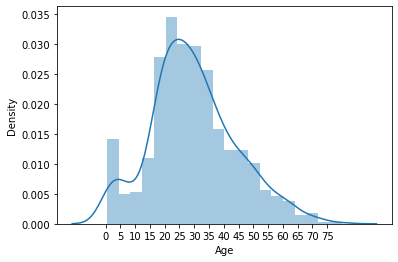

In [ ]:
sns.distplot(train['Age'])
plt.xticks(np.arange(0,80,5))
plt.show()

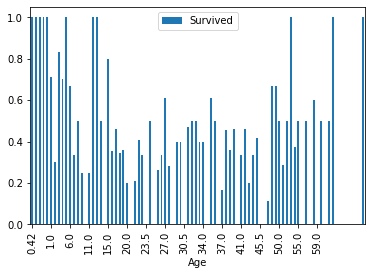

In [ ]:
train[['Age', 'Survived']].groupby(['Age'], as_index=True).mean().plot.bar()
plt.xticks(np.arange(0,80,5))
plt.show()


In [ ]:
# name > initial
train['Initial']= train.Name.str.extract('([A-Za-z]+)\.') 
test['Initial']= test.Name.str.extract('([A-Za-z]+)\.') 

In [ ]:
# initial & sex 
pd.crosstab(train['Initial'], train['Sex']).T.style.background_gradient(cmap='summer_r') 

Initial,Capt,Col,Countess,Don,Dr,Jonkheer,Lady,Major,Master,Miss,Mlle,Mme,Mr,Mrs,Ms,Rev,Sir
Sex,,,,,,,,,,,,,,,,,
female,0,0,1,0,1,0,1,0,0,182,2,1,0,125,1,0,0
male,1,2,0,1,6,1,0,2,40,0,0,0,517,0,0,6,1


In [ ]:
train['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

test['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don', 'Dona'],
                        ['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Mr','Mr','Mr', 'Mr'],inplace=True)

train.groupby('Initial')['Survived'].mean()

Initial
Master    0.575000
Miss      0.704301
Mr        0.162571
Mrs       0.795276
Other     0.111111
Name: Survived, dtype: float64

In [ ]:
train.loc[(train.Age.isnull())&(train.Initial=='Mr'),'Age'] = 33
train.loc[(train.Age.isnull())&(train.Initial=='Mrs'),'Age'] = 36
train.loc[(train.Age.isnull())&(train.Initial=='Master'),'Age'] = 5
train.loc[(train.Age.isnull())&(train.Initial=='Miss'),'Age'] = 22
train.loc[(train.Age.isnull())&(train.Initial=='Other'),'Age'] = 46

test.loc[(test.Age.isnull())&(test.Initial=='Mr'),'Age'] = 33
test.loc[(test.Age.isnull())&(test.Initial=='Mrs'),'Age'] = 36
test.loc[(test.Age.isnull())&(test.Initial=='Master'),'Age'] = 5
test.loc[(test.Age.isnull())&(test.Initial=='Miss'),'Age'] = 22
test.loc[(test.Age.isnull())&(test.Initial=='Other'),'Age'] = 46

In [ ]:
def category_age(x):
    if x < 5 :
       return 1
    if 5<=x<10:
       return 2
    if 10<=x<16:
       return 3
    if 16<=x<20:
       return 4      # 16세~ 성인 간주 
    if 20<=x<30:
       return 5
    if 30<=x<40:
       return 6
    if 40<=x<50:
       return 7
    if 50<=x<60:
       return 8
    if 60<=x<70:
       return 9
    if 70<=x<=80:
       return 10

In [ ]:
train['Age_cat'] = train['Age'].apply(category_age)
test['Age_cat'] = test['Age'].apply(category_age)
train.drop(['Age'], axis=1, inplace=True)
test.drop(['Age'], axis=1, inplace=True)

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


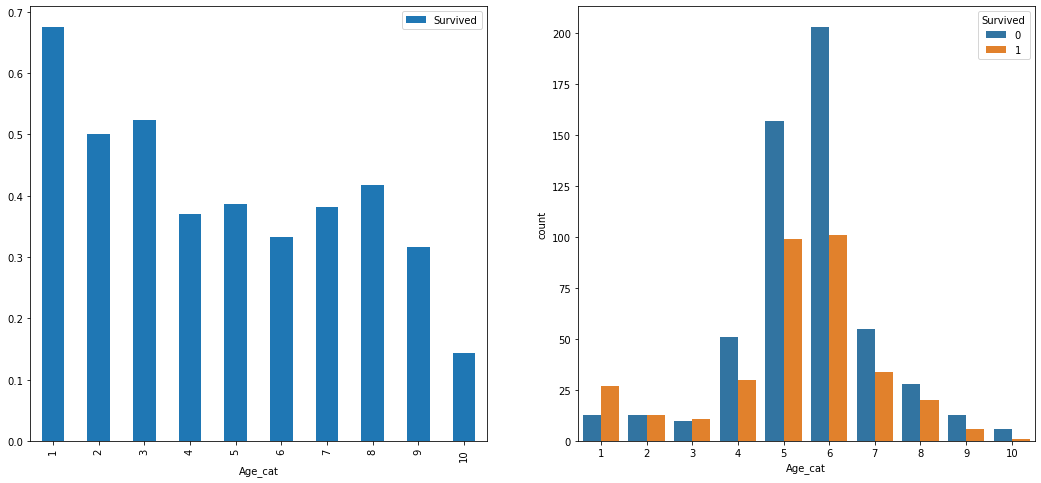

In [ ]:
f, ax = plt.subplots(1, 2, figsize=(18, 8))
train[['Age_cat', 'Survived']].groupby(['Age_cat'], as_index=True).mean().plot.bar(ax=ax[0])
sns.countplot('Age_cat', hue='Survived', data=train, ax=ax[1])

plt.show()

In [ ]:
# 1 / 3 생존률이 높다. (0~5, 10~16)

Embarked

In [ ]:
train['Embarked'].fillna('S', inplace=True)

Fare

C:\Users\CPB06GameN\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


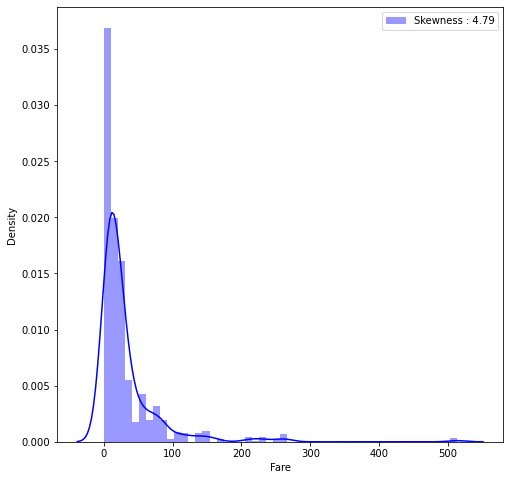

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 8))
g = sns.distplot(train['Fare'], color='b', label='Skewness : {:.2f}'.format(train['Fare'].skew()), ax=ax)
g = g.legend(loc='best')

In [ ]:
# fare > log
test.loc[test.Fare.isnull(), 'Fare'] = test['Fare'].mean()

train['Fare'] = train['Fare'].map(lambda i: np.log(i) if i > 0 else 0)    # 음수 방지
test['Fare'] = test['Fare'].map(lambda i: np.log(i) if i > 0 else 0) 

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat
0,1,0,3,"Braund, Mr. Owen Harris",male,1,0,A/5 21171,1.981001,NaN,S,Mr,5
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,1,0,PC 17599,4.266662,C85,C,Mrs,6
2,3,1,3,"Heikkinen, Miss. Laina",female,0,0,STON/O2. 3101282,2.070022,NaN,S,Miss,5
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,1,0,113803,3.972177,C123,S,Mrs,6
4,5,0,3,"Allen, Mr. William Henry",male,0,0,373450,2.085672,NaN,S,Mr,6


initial / sex / embarked 매핑

In [ ]:
train['Initial'] = train['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})
test['Initial'] = test['Initial'].map({'Master': 0, 'Miss': 1, 'Mr': 2, 'Mrs': 3, 'Other': 4})

train['Sex'] = train['Sex'].map({'male':0, 'female':1})
test['Sex'] = test['Sex'].map({'male':0, 'female':1})

train['Embarked'] = train['Embarked'].map({'S': 0, 'C':1, 'Q':2})
test['Embarked'] = test['Embarked'].map({'S': 0, 'C':1, 'Q':2})

sibsp + parch > familysize

In [ ]:
train['FamilySize'] = train['SibSp'] + train['Parch'] + 1 
test['FamilySize'] = test['SibSp'] + test['Parch'] + 1 

변수 간 상관관계 보기

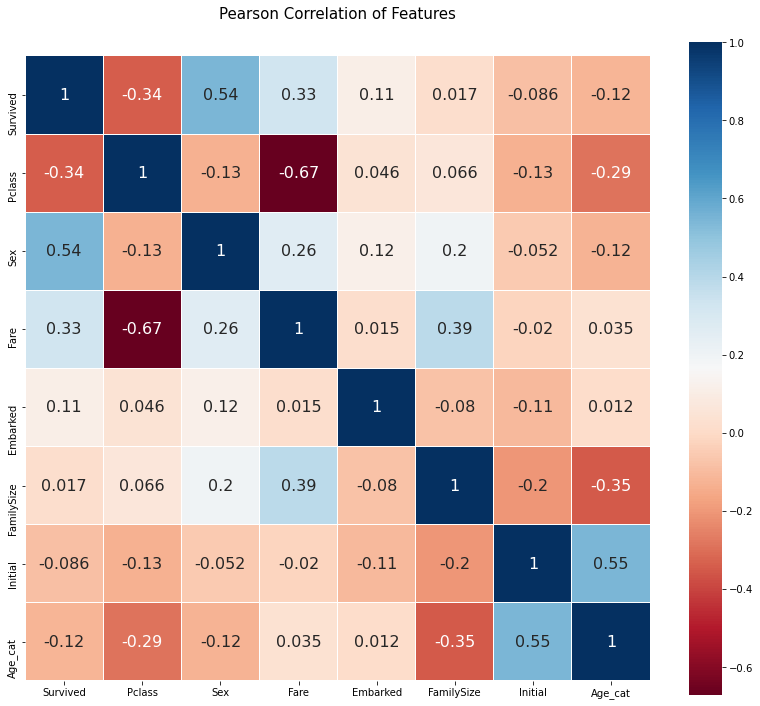

In [ ]:
heatmap_data = train[['Survived', 'Pclass', 'Sex', 'Fare', 'Embarked', 'FamilySize', 'Initial', 'Age_cat']] 

colormap = plt.cm.RdBu
plt.figure(figsize=(14, 12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(heatmap_data.astype(float).corr(), linewidths=0.1, vmax=1.0,
           square=True, cmap=colormap, linecolor='white', annot=True, annot_kws={"size": 16})

del heatmap_data

전처리

In [ ]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat,FamilySize
0,1,0,3,"Braund, Mr. Owen Harris",0,1,0,A/5 21171,1.981001,NaN,0,2,5,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,0,PC 17599,4.266662,C85,1,3,6,2
2,3,1,3,"Heikkinen, Miss. Laina",1,0,0,STON/O2. 3101282,2.070022,NaN,0,1,5,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,0,113803,3.972177,C123,0,3,6,2
4,5,0,3,"Allen, Mr. William Henry",0,0,0,373450,2.085672,NaN,0,2,6,1


In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Age_cat,FamilySize
0,892,3,"Kelly, Mr. James",0,0,0,330911,2.057860,NaN,2,2,6,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,1,0,363272,1.945910,NaN,0,3,7,2
2,894,2,"Myles, Mr. Thomas Francis",0,0,0,240276,2.270836,NaN,2,2,9,1
3,895,3,"Wirz, Mr. Albert",0,0,0,315154,2.159003,NaN,0,2,5,1
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1,1,3101298,2.508582,NaN,0,3,5,3


In [ ]:
train.drop(['PassengerId', 'Name', 'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)
test.drop(['PassengerId', 'Name',  'SibSp', 'Parch', 'Ticket', 'Cabin'], axis=1, inplace=True)

In [ ]:
# 1 원핫
# initial, embarked

# train = pd.get_dummies(train, columns=['Initial'], prefix='Initial')
# test = pd.get_dummies(test, columns=['Initial'], prefix='Initial')

# train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
# test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

# train.head()

In [ ]:
# 2 원핫
# initial, age_cat

# train = pd.get_dummies(train, columns=['Initial'], prefix='Initial')
# test = pd.get_dummies(test, columns=['Initial'], prefix='Initial')

# train = pd.get_dummies(train, columns=['Age_cat'], prefix='Age_cat')
# test = pd.get_dummies(test, columns=['Age_cat'], prefix='Age_cat')

# train.head()

In [ ]:
# 3 원핫
# initial, embarked, age_cat

# train = pd.get_dummies(train, columns=['Initial'], prefix='Initial')
# test = pd.get_dummies(test, columns=['Initial'], prefix='Initial')

# train = pd.get_dummies(train, columns=['Embarked'], prefix='Embarked')
# test = pd.get_dummies(test, columns=['Embarked'], prefix='Embarked')

# train = pd.get_dummies(train, columns=['Age_cat'], prefix='Age_cat')
# test = pd.get_dummies(test, columns=['Age_cat'], prefix='Age_cat')

# train.head()

,Survived,Pclass,Sex,Fare,FamilySize,Initial_0,Initial_1,Initial_2,Initial_3,Initial_4,...,Age_cat_1,Age_cat_2,Age_cat_3,Age_cat_4,Age_cat_5,Age_cat_6,Age_cat_7,Age_cat_8,Age_cat_9,Age_cat_10
0,0,3,0,1.981001,2,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1,1,1,1,4.266662,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
2,1,3,1,2.070022,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,1,1,1,3.972177,2,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
4,0,3,0,2.085672,1,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0


모델링

In [ ]:
#importing all the required ML packages
from sklearn.ensemble import RandomForestClassifier # 유명한 randomforestclassfier 입니다. 
from sklearn import metrics # 모델의 평가를 위해서 씁니다
from sklearn.model_selection import train_test_split # traning set을 쉽게 나눠주는 함수입니다.

In [ ]:
X_train = train.drop('Survived', axis=1).values
target_label = train['Survived'].values
X_test = test.values

In [ ]:
X_tr, X_vld, y_tr, y_vld = train_test_split(X_train, target_label, test_size=0.3, random_state=2022)

In [ ]:
model = RandomForestClassifier()
model.fit(X_tr, y_tr)
prediction = model.predict(X_vld)

In [ ]:
print('총 {}명 중 {:.2f}% 정확도로 생존을 맞춤'.format(y_vld.shape[0], 100 * metrics.accuracy_score(prediction, y_vld)))

총 268명 중 79.48% 정확도로 생존을 맞춤


In [ ]:
# 학습된 모델의 feature importance
# 해당 모델이 어떤 피쳐에 영향을 많이 받았는지 

from pandas import Series

feature_importance = model.feature_importances_
Series_feat_imp = Series(feature_importance, index=test.columns)

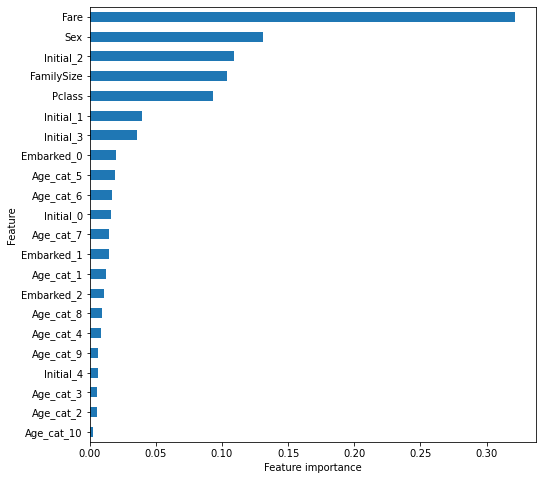

In [ ]:
plt.figure(figsize=(8, 8))
Series_feat_imp.sort_values(ascending=True).plot.barh()
plt.xlabel('Feature importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
# Test prediction

submission = pd.read_csv('gender_submission.csv')

prediction = model.predict(X_test)
submission['Survived'] = prediction

submission.to_csv('n5.csv', index=False)